# Chapter 4 Practical - Frequency Response

## Evaluating the frequency response characteristics of digital filters

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SAMPLE_FREQUENCY = 2
def evaluate_filter(filter_numerator, filter_denominator = 1, filter_name: str = "Digital filter"):
    eval_freqs, freq_response = signal.freqz(filter_numerator, filter_denominator, fs=SAMPLE_FREQUENCY)
    fig = plt.figure()
    plt.title(f"{filter_name} frequency response")
    ax1 = fig.add_subplot(111)
    plt.plot(eval_freqs, 20 * np.log10(abs(freq_response)), 'b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [rad/sample]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(freq_response))
    plt.plot(eval_freqs, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    plt.show()

### Simple Filters

<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be crea

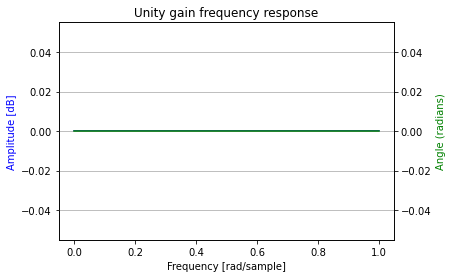

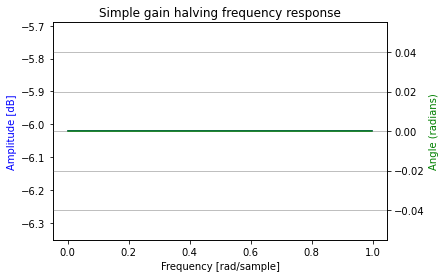

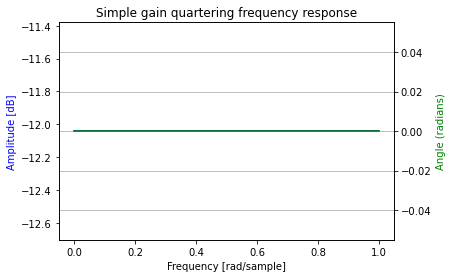

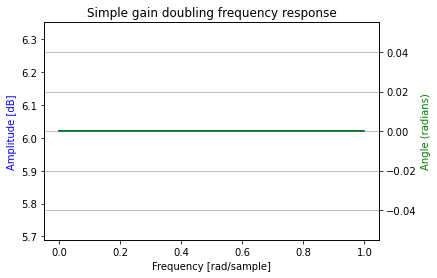

In [3]:
evaluate_filter(1, filter_name="Unity gain")
evaluate_filter(.5, filter_name="Simple gain halving")
evaluate_filter(.25, filter_name="Simple gain quartering")
evaluate_filter(2, filter_name="Simple gain doubling")

### Moving Average Filters

<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
<ipython-input-2-483b3eda8bf6>:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(eval_freqs, 20 * np.log10(abs(freq_response)), 'b')
<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Addin

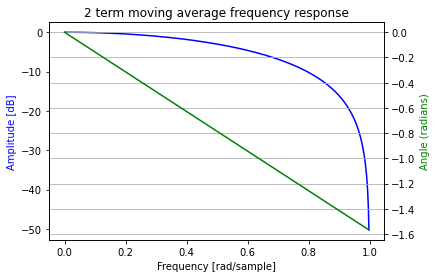

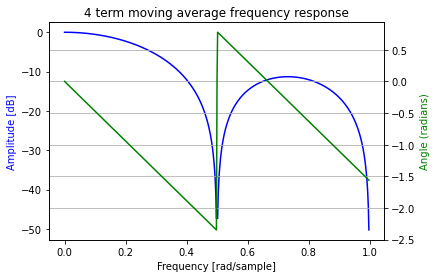

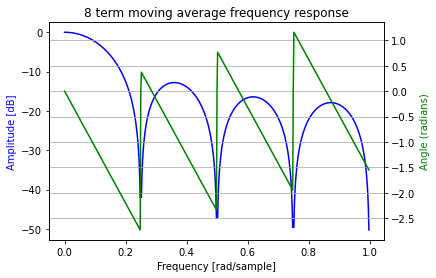

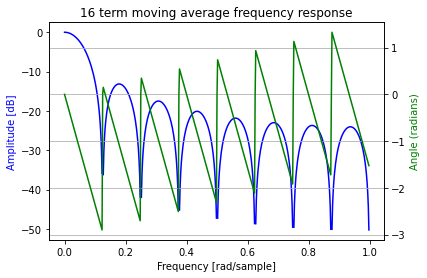

In [4]:
for num_terms in (2, 4, 8, 16):
    filter_coefficients = np.full(num_terms, 1 / num_terms)
    evaluate_filter(filter_coefficients, filter_name=f"{num_terms} term moving average")

### Window-method FIR Filters

Window defaults to Hamming.

[0.06799017 0.86401967 0.06799017]


<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


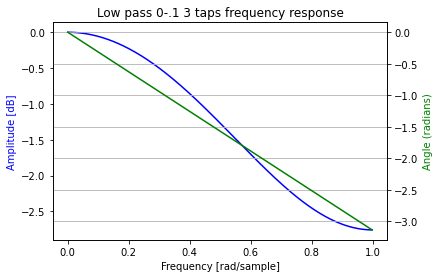

In [5]:
low_pass_3_taps = signal.firwin(numtaps=3, cutoff=.1)
print(low_pass_3_taps)
evaluate_filter(low_pass_3_taps, filter_name="Low pass 0-.1 3 taps")

[0.0119823  0.0325937  0.08880972 0.15903361 0.20758067 0.20758067
 0.15903361 0.08880972 0.0325937  0.0119823 ]


<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)
<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


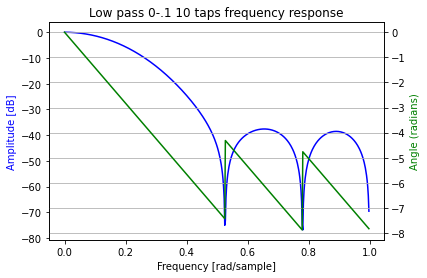

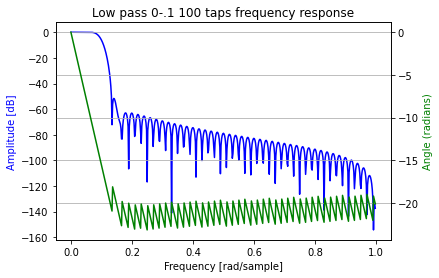

In [6]:
low_pass_10_taps = signal.firwin(numtaps=10, cutoff=.1)
print(low_pass_10_taps)
evaluate_filter(low_pass_10_taps, filter_name="Low pass 0-.1 10 taps")

evaluate_filter(signal.firwin(numtaps=100, cutoff=.1), filter_name="Low pass 0-.1 100 taps")

[-0.00754987 -0.0535842   0.90793134 -0.0535842  -0.00754987]


<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


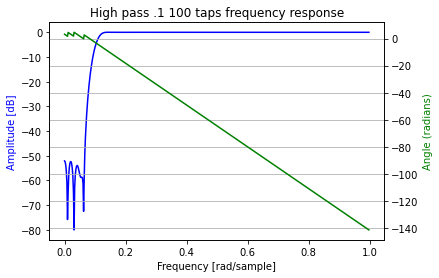

In [7]:
print(signal.firwin(numtaps=5, cutoff=.1, pass_zero=False))
evaluate_filter(signal.firwin(numtaps=99, cutoff=.1, pass_zero=False), filter_name="High pass .1 100 taps")

[-0.00581862 -0.060279    1.13219523 -0.060279   -0.00581862]


<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


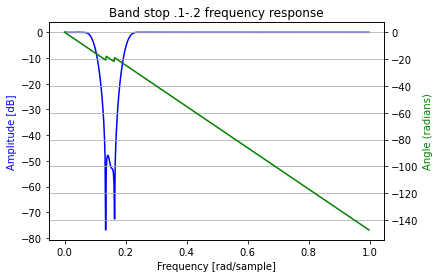

In [8]:
print(signal.firwin(numtaps=5, cutoff=[.1, .2]))
evaluate_filter(signal.firwin(numtaps=99, cutoff=[.1, .2]), filter_name="Band stop .1-.2")

[0.02423843 0.2511022  0.52403863 0.2511022  0.02423843]


<ipython-input-2-483b3eda8bf6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


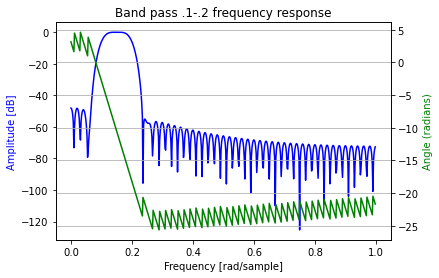

In [9]:
print(signal.firwin(numtaps=5, cutoff=[.1, .2], pass_zero=False))
evaluate_filter(signal.firwin(numtaps=99, cutoff=[.1, .2], pass_zero=False), filter_name="Band pass .1-.2")

Questions:

1. Difference between a Type I and Type II filter
2. What is the Nyquist frequency